# Module 6: Perform Custom EDA (Titanic) 


Author: Jaystin Garcia

Date: February 16, 2026

Purpose: In this project, I will be conducting my own exploratory data analysis on Titanic data. This project explores the Titanic passenger dataset, which contains demographic information, ticket class, fares, family relationships, and survival outcomes for passengers aboard the Titanic

# Section 1: Imports and Configuration

In [14]:
# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here


from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

# Pandas display configuration (helps in notebooks)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete.")

Imports complete.


# Section 2: Load the Data

In [15]:
# Python cell

# Load the titanic dataset from Seaborn
# Into a pandas DataFrame (2D table)
titanic_df: pd.DataFrame = sns.load_dataset("titanic")

# Preview the first few rows
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Section 3: Inspect Data and Structure

In [16]:
# Section 3 Python cell

# Get shape - number of rows and columns
shape: tuple[int, int] = titanic_df.shape

# Communicate the shape clearly
print(f"The titanic dataset has {shape[0]} rows and {shape[1]} columns.")

# Display column names and data types
titanic_df.info()

# List the column names
print("Column names:")
print(list(titanic_df.columns))

The titanic dataset has 891 rows and 15 columns.
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB
Column names:
['survived', 'pclass', 'sex', '

# Section 4: Create a dictionary and check data quality

In [17]:
# Count missing values in each column
print("Missing values per column:")
print(titanic_df.isnull().sum())

# Check for duplicate rows
num_duplicates = titanic_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Number of duplicate rows: 107


# Section 5: Create Clean View for EDA
The titanic dataset contains several columns with missing values. The "deck" colum is missing for the majority of passengers, so dropping rows with missing values would remove most of the dataset. Instead, drop the entire "deck" column because it is too incomplete.

The "age" column is important for understanding survival patterns, so remove only the rows where age is missing.

After handling missing values, remove duplicate rows to ensure the clean data set contains only unique passenger records.

In [18]:
# Drop the deck column (too many missing values)
titanic_clean = titanic_df.drop(columns=["deck"])

# Drop rows missing age 
titanic_clean = titanic_clean.dropna(subset=["age"])

# Remove duplicates
titanic_clean = titanic_clean.drop_duplicates()

print("Original rows:", len(titanic_df))
print("Clean rows:", len(titanic_clean))
print("Rows removed:", len(titanic_df) - len(titanic_clean))

Original rows: 891
Clean rows: 676
Rows removed: 215


# Section 6: Descriptive Statistics for Numeric Columns

In [22]:
# Summarize the clean dataset
print("\nSummary of clean dataset:")
print(titanic_clean.describe(include="all"))

# Transpose the summary for better readability
print("\nTransposed summary of clean dataset:")
titanic_clean.describe(include="all").T


Summary of clean dataset:
          survived      pclass   sex         age       sibsp       parch        fare embarked  class  who adult_male  \
count   676.000000  676.000000   676  676.000000  676.000000  676.000000  676.000000      674    676  676        676   
unique         NaN         NaN     2         NaN         NaN         NaN         NaN        3      3    3          2   
top            NaN         NaN  male         NaN         NaN         NaN         NaN        S  Third  man       True   
freq           NaN         NaN   421         NaN         NaN         NaN         NaN      518    334  381        381   
mean      0.418639    2.221893   NaN   29.812751    0.535503    0.454142   35.851584      NaN    NaN  NaN        NaN   
std       0.493701    0.847406   NaN   14.727098    0.946062    0.870571   54.074528      NaN    NaN  NaN        NaN   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000    0.000000      NaN    NaN  NaN        NaN   
25%       0.0

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,676.0,NaN,NaN,NaN,0.418639,0.493701,0.0,0.0,0.0,1.0,1.0
pclass,676.0,NaN,NaN,NaN,2.221893,0.847406,1.0,1.0,2.0,3.0,3.0
sex,676,2,male,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,676.0,NaN,NaN,NaN,29.812751,14.727098,0.42,20.0,28.0,39.0,80.0
sibsp,676.0,NaN,NaN,NaN,0.535503,0.946062,0.0,0.0,0.0,1.0,5.0
parch,676.0,NaN,NaN,NaN,0.454142,0.870571,0.0,0.0,0.0,1.0,6.0
fare,676.0,NaN,NaN,NaN,35.851584,54.074528,0.0,8.05,16.1,35.5,512.3292
embarked,674,3,S,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,676,3,Third,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,676,3,man,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Numeric Summary Statistics
print("\nNumeric summary statistics:")
print(titanic_clean.describe().T)


Numeric summary statistics:
          count       mean        std   min    25%   50%   75%       max
survived  676.0   0.418639   0.493701  0.00   0.00   0.0   1.0    1.0000
pclass    676.0   2.221893   0.847406  1.00   1.00   2.0   3.0    3.0000
age       676.0  29.812751  14.727098  0.42  20.00  28.0  39.0   80.0000
sibsp     676.0   0.535503   0.946062  0.00   0.00   0.0   1.0    5.0000
parch     676.0   0.454142   0.870571  0.00   0.00   0.0   1.0    6.0000
fare      676.0  35.851584  54.074528  0.00   8.05  16.1  35.5  512.3292


According to the Numeric summary statistics table, the following observations can be made:
- About 41.9% of the cleaned dataset survived
- Most passengers were in the 2nd or 3rd class
- 1st class was the smallest group of passengers
- At least half had no siblings or spouse aboard. Most traveled alone.
- Fares vary dramatically. Some paid nothing (assuming this was crew data) while others paid enormous amounts (assuming this was the wealthy population)
  

# Section 7 - Correlation Matrix for Numeric Columns

In the Titanic dataset, correlations can reveal patterns such as whether age, fare, or class relate to survival.

In [24]:
# Compute correlation matrix for numeric columns
corr_matrix = titanic_clean.corr(numeric_only=True)

print("Correlation matrix:")
corr_matrix

Correlation matrix:


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.356930,-0.084985,-0.036626,0.080925,0.259762,-0.535099,-0.177529
pclass,-0.356930,1.000000,-0.366477,0.077012,0.033895,-0.555264,0.082634,0.137265
age,-0.084985,-0.366477,1.000000,-0.314239,-0.193819,0.093877,0.295489,0.207565
sibsp,-0.036626,0.077012,-0.314239,1.000000,0.375222,0.129946,-0.299829,-0.621023
parch,0.080925,0.033895,-0.193819,0.375222,1.000000,0.197134,-0.356693,-0.572338
fare,0.259762,-0.555264,0.093877,0.129946,0.197134,1.000000,-0.169307,-0.250234
adult_male,-0.535099,0.082634,0.295489,-0.299829,-0.356693,-0.169307,1.000000,0.383585
alone,-0.177529,0.137265,0.207565,-0.621023,-0.572338,-0.250234,0.383585,1.000000


According to the correlation matrix, the following observations can be made:
- Gender (adult_male) is the strongest predictor of survival
- Class and fare also matter significantly
- Age matters surprisingly little
- Family structure influences survival indirectly
- Being alone slightly reduces survival chances

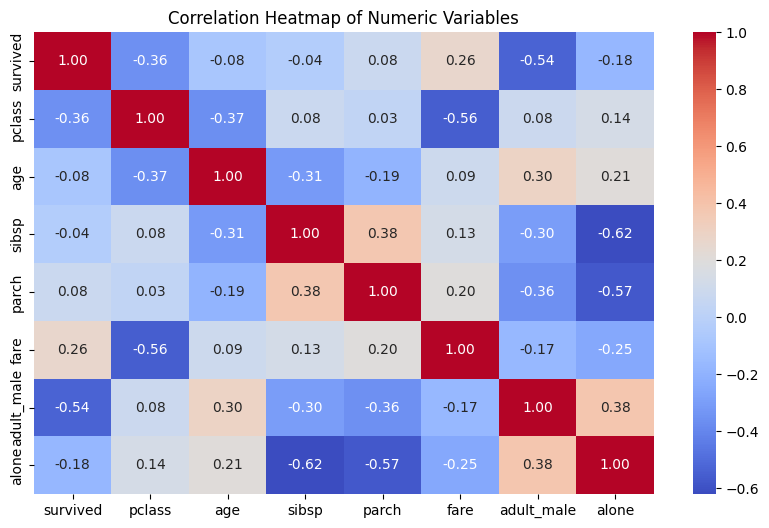

In [25]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

According to the Correlation Heatmap of Numeric Variables:
- Gender is the strongest survival factor
- Class and fare strongly shape survival outcomes
- Age and family size matter, but less dramatically


# Section 8: Additional Plots

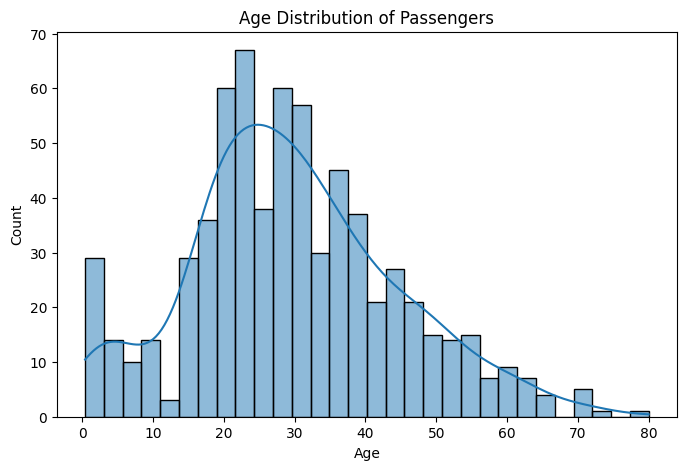

In [26]:
# 8.1 Distribution of ages
plt.figure(figsize=(8, 5))
sns.histplot(titanic_clean["age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

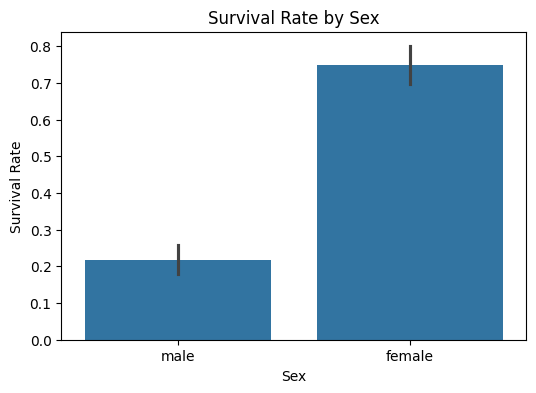

In [27]:
# 8.2 Survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(data=titanic_clean, x="sex", y="survived")
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

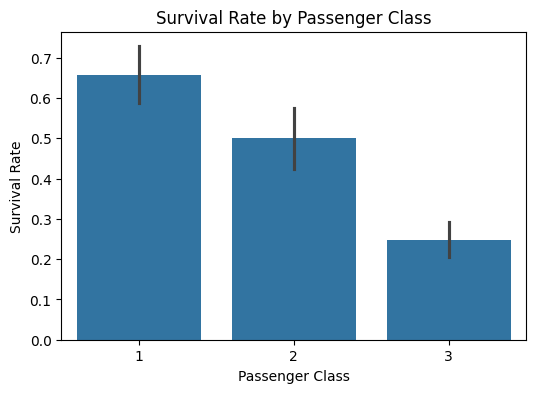

In [28]:
# Survival rate by passenger class
plt.figure(figsize=(6, 4))
sns.barplot(data=titanic_clean, x="pclass", y="survived")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

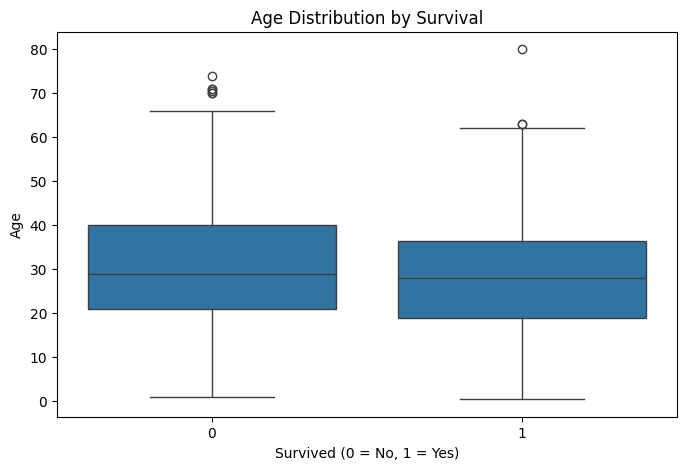

In [29]:
# Age Distribution by Survival
plt.figure(figsize=(8, 5))
sns.boxplot(data=titanic_clean, x="survived", y="age")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

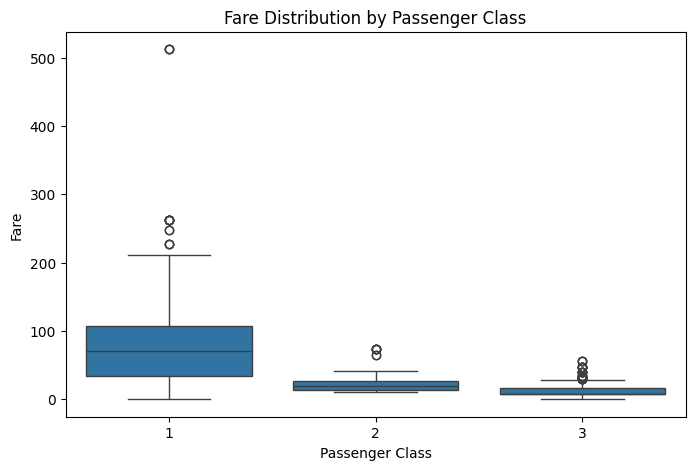

In [30]:
# Fare by Passenger Class
plt.figure(figsize=(8, 5))
sns.boxplot(data=titanic_clean, x="pclass", y="fare")
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

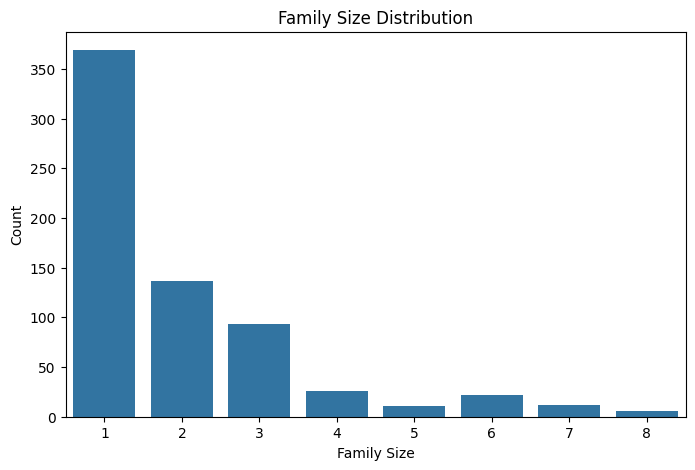

In [31]:
# Family size distribution
titanic_clean["family_size"] = (
    titanic_clean["sibsp"] + titanic_clean["parch"] + 1
)

plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_clean, x="family_size")
plt.title("Family Size Distribution")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()